## **AI Data Analysis**

Possible Models to test:
- Moving Average Time Series Model
- Autoregressive Model

Features: Group_Name, group_id, time_sequnece

### **DataFrame**
Grabs the training and testing dataset from google drive

In [61]:
import pandas as pd
training_url = 'https://drive.google.com/file/d/1uVq3dwf4CKwLd5U0Y8uMOjxkjjXmXfvO/view?usp=sharing'
testing_url='https://drive.google.com/file/d/1tELkS1DEUddnpKkguctOj6t8LvgJYDIz/view?usp=sharing'
training_file_id=training_url.split('/')[-2]
testing_file_id = testing_url.split('/')[-2]
teest_dwn_url='https://drive.google.com/uc?id=' + testing_file_id
train_dwn_url = 'https://drive.google.com/uc?id=' + training_file_id
training_dataset = pd.read_csv(train_dwn_url)
testing_dataset = pd.read_csv(train_dwn_url)
print(training_dataset.head())
print(testing_dataset.head())

   group_id          arrive_time          depart_time  Fleet_Number   
0    2375.0  2023-05-15 07:35:09  2023-05-15 07:35:49           934  \
1    1505.0  2023-05-15 07:37:54  2023-05-15 07:39:15           934   
2    2375.0  2023-05-15 07:53:50  2023-05-15 07:55:10           934   
3    1505.0  2023-05-15 07:57:12  2023-05-15 07:58:15           934   
4    2375.0  2023-05-15 08:24:28  2023-05-15 08:24:48           934   

   Timepoint  Time Difference Type Time      Group_Name dayofweek   
0          1  0 days 00:03:26    depart  bayhi_to_oakes         M  \
1          1  0 days 00:03:26    depart  bayhi_to_oakes         M   
2          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
3          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
4          1  0 days 00:02:40    depart  bayhi_to_oakes         M   

              Sequence  
0  05:00:00 - 07:45:00  
1  05:00:00 - 07:45:00  
2  07:50:00 - 07:55:00  
3  07:55:00 - 08:00:00  
4  08:05:00 - 09:00:00  
   group

### **Filter Data**
- Filter the data so data vizualization makes sense

In [66]:
filtered_training_data = training_dataset[training_dataset["dayofweek"].apply(lambda x: x in "MWF")]
filtered_training_data = filtered_training_data[filtered_training_data["Sequence"] == "05:00:00 - 07:45:00"]
filtered_training_data = filtered_training_data[filtered_training_data["Type Time"].apply(lambda x : x in "depart")]
#filtered_training_data = filtered_training_data.loc[filtered_training_data["group_id"] == 2375.0]
filtered_training_data.to_csv("G:\\My Drive\\Fall 2023\\TIM 147\\Bus-Data-Project\\output.csv", index=False, header=True)
print(filtered_training_data)

       group_id          arrive_time          depart_time  Fleet_Number   
0        2375.0  2023-05-15 07:35:09  2023-05-15 07:35:49           934  \
1        1505.0  2023-05-15 07:37:54  2023-05-15 07:39:15           934   
64       2375.0  2023-05-19 07:31:21  2023-05-19 07:35:18           934   
65       1505.0  2023-05-19 07:37:21  2023-05-19 07:38:20           934   
96       2375.0  2023-05-22 07:37:21  2023-05-22 07:37:42           934   
...         ...                  ...                  ...           ...   
21594    1505.0  2023-05-22 07:36:55  2023-05-22 07:37:40           936   
21642    1505.0  2023-05-24 07:37:31  2023-05-24 07:38:27           936   
21848    1505.0  2023-05-22 07:40:49  2023-05-22 07:41:26           927   
21990    1505.0  2023-04-21 07:42:43  2023-04-21 07:43:15           921   
22262    1505.0  2023-05-12 07:36:35  2023-05-12 07:37:37           938   

       Timepoint  Time Difference Type Time      Group_Name dayofweek   
0              1  0 days 0

### **Data Visualization**
- Vizusalize the data with group name and time

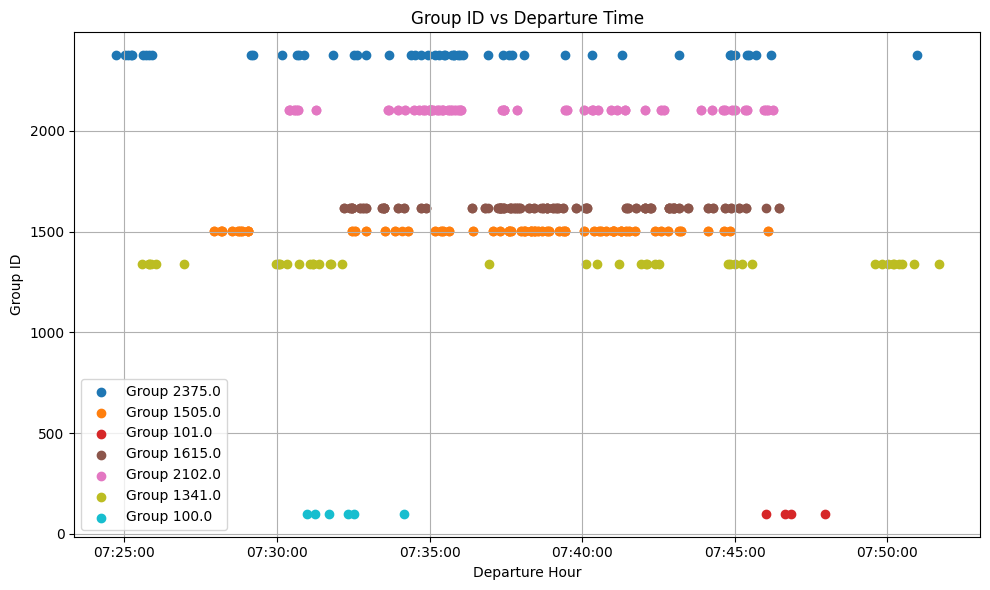

In [70]:
import matplotlib.pyplot as plt
x = filtered_training_data["group_id"]
y = pd.to_datetime(filtered_training_data["depart_time"])
y = y.apply(lambda x: x.replace(year=1990, month=1, day=1))

#print(y)
unique_group_ids = x.unique()
colors = plt.cm.get_cmap('tab10', len(unique_group_ids))  # Use a colormap for distinct colors

# Create a scatter plot with different colors for each group_id
plt.figure(figsize=(10, 6))  # Set the figure size
for i, group_id in enumerate(unique_group_ids):
    group_y = y[x == group_id]
    group_x = x[x == group_id]
    plt.scatter(group_y, group_x, marker='o', label=f'Group {group_id}', color=colors(i))

plt.xlabel('Departure Hour')
plt.ylabel('Group ID')
plt.title('Group ID vs Departure Time')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()